# Women's Clothing E-Commerce with Natural Language Processing 
_by Nick "Upping his game for 2018" Brooks, Janurary 2018_

- [**Github**](https://github.com/nicapotato)
- [**Kaggle**](https://www.kaggle.com/nicapotato/)
- [**Linkedin**](https://www.linkedin.com/in/nickbrooks7)

***

**Programming Language:** Python 3.5 in the Jupyter Notebook Environment

**Textbook Resources Used:** <br>
- Swamynathan, Manohar. Mastering Machine Learning with Python in Six Steps: a Practical
- Implementation Guide to Predictive Data Analytics Using Python. Apress, 2017.
- Bird, Steven. Natural Language Processing with Python. O&#39;Reilly Media, 2016.

**Code Navigation:** <br>
In the code, text after hastags (#) are supportive explanations, not executed as code.
Indented line signifies code is part of larger function or loop. Not standalone. Furthermore,
functions are used in order to facilitate the simplicity and exploratory process of the code.
Code: Packages Used

# Tables of Content:

1. [Introduction](#Introduction)
2. [Pre-Processing](#Pre-Processing)
3. [Helper/Utility Functions](#Helper/Utility Functions)
4. [Exploratory Data Analysis](#Exploratory Data Analysis)
5. [Sentiment Analysis](#Sentiment Analysis)
6. [Word Distribution and Word Cloud](#Word Distribution and Word Cloud)
7. [Supervised Learning](#Supervised Learning)
8. [Word2Vec](#Word2Vec)

# **1. Introduction:** <a id="Introduction"></a> <br>
This notebook is concerned with using the Python programming language and Natural Language Processing technology to explore trends in the customer reviews from an anonymized women’s clothing E-commerce platform, and extract actionable plans to improve its online e-commerce. The data is a collection of 22641 Rows and 10 column variables. Each row includes a written comment as well as additional customer information. This analysis will focus on using Natural Language techniques to find broad trends in the written thoughts of the customers. The total number of unique words in the dataset is 9810. In this analysis, the data will be introduced using exploratory data analysis, and will be further analyzed by employing:

** METHODS **
- **Text Pre-Processing**
- **Data Visualization**
- **Frequency distribution**
- **Word Clouds**
- **Sentiment Analysis**
- **Naive Bayes**
- **Word2Vec**

# Summarized Findings:


In [1]:
# General
import numpy as np
import pandas as pd
import nltk
import random
import os
from os import path
from PIL import Image

# Visualization
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from subprocess import check_output
from wordcloud import WordCloud, STOPWORDS

# Set Plot Theme
sns.set_palette([
    "#30a2da",
    "#fc4f30",
    "#e5ae38",
    "#6d904f",
    "#8b8b8b",
])
# Alternate # plt.style.use('fivethirtyeight')

# Pre-Processing
import string
from nltk.tokenize import RegexpTokenizer
from nltk.corpus import stopwords
import re
from nltk.stem import PorterStemmer

# Modeling
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from nltk.sentiment.util import *
from nltk.util import ngrams
from collections import Counter
from gensim.models import word2vec

# Warnings
# import warnings
# warnings.filterwarnings('ignore')

D:\WindowsApps\Anaconda\envs\tensorflow\lib\site-packages\nltk\twitter\__init__.py:20: UserWarning: The twython library has not been installed. Some functionality from the twitter package will not be available.
  warnings.warn("The twython library has not been installed. "
D:\WindowsApps\Anaconda\envs\tensorflow\lib\site-packages\gensim\utils.py:860: UserWarning: detected Windows; aliasing chunkize to chunkize_serial
  warnings.warn("detected Windows; aliasing chunkize to chunkize_serial")


**Code Explanation and Reasoning:** <br>
These packages are seperated in four categories: *General, Visualization, Pre-Processing, and Modeling*.

The General category includes the basic data manipulation tools for scientific computation (numpy), dataframes (pandas), Natural Language Processing (NLTK), path directory manipulation (os), and image saving (PIL).

The Visualiation section enables the creation of simple graphics (matplotlib, seaborn), aswell as wordclouds (wordcloud).

The Pre-Processing section extracts more specialized modules from the NLTK package such as tokenizers and stemmers to enable the preperation of text data for mathematical analysis.

The Modeling section includes NLTK’s sentiment analysis module, which can determine the mood of text, NLTK’s N-grams, and gensim’s word2vec.

In [2]:
# Read and Peak at Data
df = pd.read_csv("Data/Women's Clothing E-Commerce Reviews.csv")
df.drop(df.columns[0],inplace=True, axis=1)
df.sample(3)

,Clothing ID,Age,Title,Review Text,Rating,Recommended IND,Positive Feedback Count,Division Name,Department Name,Class Name
13373,1072,35,"Great dress, poor stitching","After the second wash, the stitching in the ar...",2,1,2,General,Dresses,Dresses
12787,1081,25,Versatile dress,"Wearing this dress for the first time now, and...",5,1,0,General Petite,Dresses,Dresses
7990,1099,33,Hips don't lie,It's rare for a dress to completely not work o...,3,0,3,General Petite,Dresses,Dresses


In [3]:
# Boolean for Positive and Negative Reviews
df["Label"] = 0
df.loc[df.Rating >= 3,["Label"]] = 1

# Delete missing observations for following variables
for x in ["Division Name","Department Name","Class Name","Review Text"]:
    df = df[df[x].notnull()]

# Extracting Missing Count and Unique Count by Column
unique_count = []
for x in df.columns:
    unique_count.append([x,len(df[x].unique()),df[x].isnull().sum()])

# Converting to Categorical Vars
# for x in [x for x,y,z in unique_count if y < 40]:
#     df[x]= df[x].astype('category')

# Missing Values
print("Missing Values: {}".format(df.isnull().sum().sum()))

# Data Dimensions
print("Dataframe Dimension: {} Rows, {} Columns".format(*df.shape))

Missing Values: 2966
Dataframe Dimension: 22628 Rows, 11 Columns


**Code Explanation and Reasoning**: <br>
After reading in the data, a binary variable is created to better to generalize "good" and "bad" reviews. It is important to note that rating is a personal level judgement. Perhaps the "Recommended" feature may provide more insight into the value of the product, since customers are putting their reputation on the line to state whether they think its worth wearing. This social dimension is paramount when it comes to this product. Indeed, I found that many reviews would declare the social responce and experience they had while wearing the clothing item.

Next, the dataset is purged of observation where the review text is unavailable. This was done because the review is the heart of this analysis. Infact, there are additional missing values, which I will leave for now, since they may provide usable extra information.

***

## 2. Univariate Distribution <a id="Univariate"></a>

To start off my analysis, I will first take a look at the distribution of individual variables. This is a good way to see what I am up against, and understand the context of the subsequent multi-variate analysis.

In [4]:
pd.DataFrame(unique_count, columns=["Column","Unique","Missing"]).set_index("Column").T

Column,Clothing ID,Age,Title,Review Text,Rating,Recommended IND,Positive Feedback Count,Division Name,Department Name,Class Name,Label
Unique,1172,77,13984,22621,5,2,82,3,6,20,2
Missing,0,0,2966,0,0,0,0,0,0,0,0


**Interpretation** <br>
There are approximately 3000 missing values, which represents 1% of the dataset, but the dataset will not get trimmed further since the review text body is the only variable that must be complete.

Amongst the categorical variables, the high unique count of Clothing ID and Class Names will require non-visual exploratory methods.

***

**Age and Positive Feedback Count Distributions:**

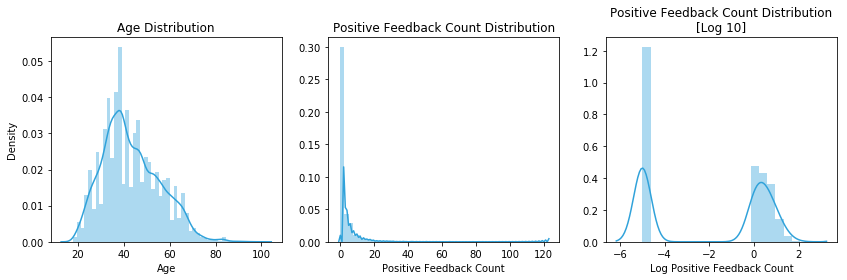

In [5]:
# Continous Distributions
f, ax = plt.subplots(1,3,figsize=(12,4), sharey=False)
sns.distplot(df.Age, ax=ax[0])
ax[0].set_title("Age Distribution")
ax[0].set_ylabel("Density")
sns.distplot(df["Positive Feedback Count"], ax=ax[1])
ax[1].set_title("Positive Feedback Count Distribution")
sns.distplot(np.log10((df["Positive Feedback Count"][df["Positive Feedback Count"].notnull()]+0.00001)), ax=ax[2])
ax[2].set_title("Positive Feedback Count Distribution\n[Log 10]")
ax[2].set_xlabel("Log Positive Feedback Count")
plt.tight_layout()
plt.show()

**Code Explanation:** <br>
Using seaborn, a simple variable frequency bar/density plot is created. In the log positive feedback count plot, I had to add 0.0001 to all values so that the logarithm of previously zero values can be taken. Matplotlib's subplots function is employed through assign each plot the **AX** arguement.

**Distribution of Age:** <br>
My a priori expectation was that the biggest group of reviewing customers would be young, tech savvy women between the age of 18 and 34. However, this plot would say otherwise, since it appears that not only is the 34 to 50 year old age most engage in reviewing products, they also appear to be the most positive reviewers, since they proportionately give higher more reviews of 5. Before making insight about these point, it would be wise to gather further data on the age distribution of shoppers. Nevertheless, this trend suggest that the core market segment for this clothing brand is women between 34 and 50.

**Distribution of Positive Feedback Count:** <br>
This kind of distribution is common for network effect phenomenon, where popularity has an exponential effect on response, and most individuals receive no attention.

***

**Division Name and Department Name Distribution**

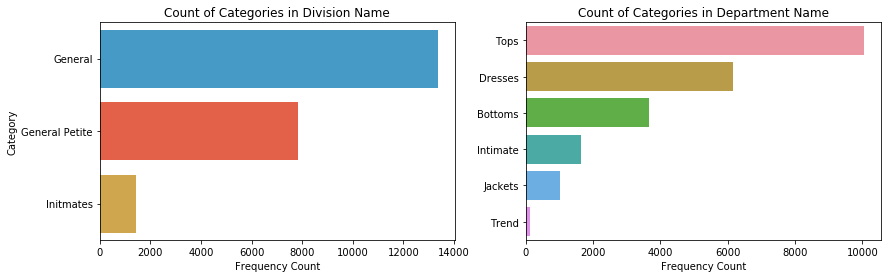

In [6]:
row_plots = ["Division Name","Department Name"]
f, axes = plt.subplots(1,len(row_plots), figsize=(14,4), sharex=False)

for i,x in enumerate(row_plots):
    sns.countplot(y=x, data=df,order=df[x].value_counts().index, ax=axes[i])
    axes[i].set_title("Count of Categories in {}".format(x))
    axes[i].set_xlabel("")
    axes[i].set_xlabel("Frequency Count")
axes[0].set_ylabel("Category")
axes[1].set_ylabel("")
plt.show()

**Code Explanation:** <br>
Enumerating the loop enables the loop iteration to coincide with the matplotlib subplot ax.

**Distribution of Division Name** <br>
This high level feature describes had three categories: General, Petite, and Intimates. This offers some insight into the clothing sizes of the customers leaving reviews.

**Distribution of Department Name** <br>
It is notable to observse that *Tops and Dresses* are the most commonly reviewed products. It would be interesting to investigate the motivation of leaving a review in the first place.

***
**Distribution of Clothing ID**

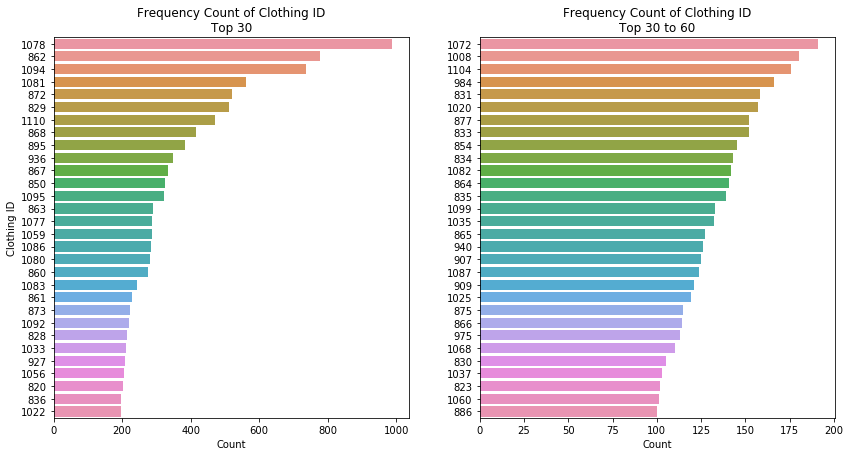

In [7]:
# Clothing ID Category
f, axes = plt.subplots(1,2, figsize=[14,7])
num = 30
sns.countplot(y="Clothing ID", data = df[df["Clothing ID"].isin(df["Clothing ID"].value_counts()[:num].index)],
              order= df["Clothing ID"].value_counts()[:num].index, ax=axes[0])
axes[0].set_title("Frequency Count of Clothing ID\nTop 30")
axes[0].set_xlabel("Count")

sns.countplot(y="Clothing ID", data = df[df["Clothing ID"].isin(df["Clothing ID"].value_counts()[num:60].index)],
              order= df["Clothing ID"].value_counts()[num:60].index, ax=axes[1])
axes[1].set_title("Frequency Count of Clothing ID\nTop 30 to 60")
axes[1].set_ylabel("")
axes[1].set_xlabel("Count")

plt.show()

In [8]:
df[df["Clothing ID"].isin([1078, 862,1094])].describe()

,Clothing ID,Age,Rating,Recommended IND,Positive Feedback Count,Label
count,2500.000000,2500.000000,2500.000000,2500.000000,2500.000000,2500.000000
mean,1015.484800,42.724800,4.189200,0.818400,2.862400,0.902400
std,103.396022,12.150429,1.104306,0.385592,6.773021,0.296832
min,862.000000,18.000000,1.000000,0.000000,0.000000,0.000000
25%,862.000000,34.000000,4.000000,1.000000,0.000000,1.000000
50%,1078.000000,41.000000,5.000000,1.000000,1.000000,1.000000
75%,1094.000000,51.000000,5.000000,1.000000,3.000000,1.000000
max,1094.000000,99.000000,5.000000,1.000000,98.000000,1.000000


In [9]:
df[df["Clothing ID"].isin([1078, 862,1094])].describe(include=["O"])

,Title,Review Text,Division Name,Department Name,Class Name
count,2180,2500,2500,2500,2500
unique,1815,2500,2,2,2
top,Beautiful dress,I originally bought the white lace version of ...,General,Dresses,Dresses
freq,21,1,1524,1722,1722


**Code Explanation** <br>
Since they are around one thousand unique *Clothing IDs*, I used boolean operators to only select the top 60 most popular cloth items, then optimizing notebook real estate by splitting them in two plot columns.

**Interpretation** <br>
It appears like there are around three products that receive a small magnitude more reviews than others. I follow up on these findings by observing the descriptive statistics of the top three items. These items received an average rating of ~4.2, and an average recommendation rate of 81%. Furthermore, it appears that these products are predominately normal sized dresses.

These observations make me wonder about the nature of review popularity and rating performance. A question that could shed light on the customer's motivation to leave a review.

In [10]:
# Parcing - http://pandas.pydata.org/pandas-docs/stable/timeseries.html#offset-aliases
def mean_count_plot(data, by, title):
    t1= data[["transactiondate","logerror"]].resample(by,on='transactiondate').agg({"mean","count"})
    t1.columns = t1.columns.droplevel()
    ax = t1.plot(secondary_y=["mean"])
    ax.set_title("Transaction Count and Mean by {}".format(title))

In [11]:
# Popularity 

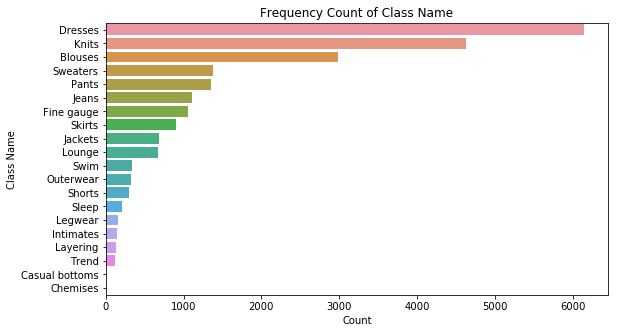

In [12]:
# Class Name
plt.subplots(figsize=(9,5))
sns.countplot(y="Class Name", data=df,order=df["Class Name"].value_counts().index)
plt.title("Frequency Count of Class Name")
plt.xlabel("Count")
plt.show()

**Interpretation:** <br>
Exploring the class variable suggests that the most popular clothing types are: Petite and Anthro, Dresses, Blouses, and Cut and Sew Knits. The distribution of reviews is fairly constant, suggesting that there are not negative nor positive outliers. This statement has been further verified by taking the mean of the label by class group. The results show that no class falls above .80, and the majority rest at .90. Casual bottoms and Chemises scored the highest in this criteria with a 100% positive review rate, however upon investigation this is because only 4 reviews were made in these categories.

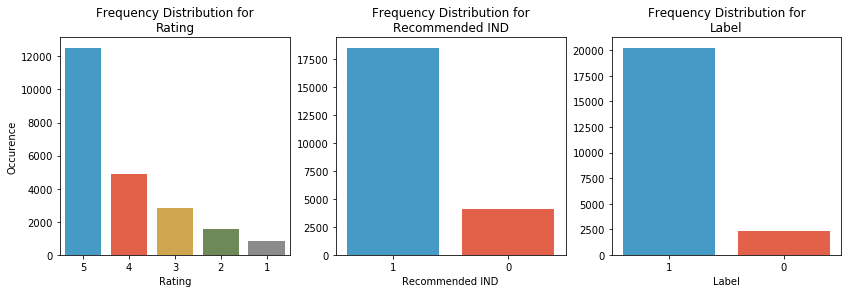

In [13]:
cat_dtypes = [x for x,y,z in unique_count if y < 10 and x not in ["Division Name","Department Name"]]
increment = 0
f, axes = plt.subplots(1,len(cat_dtypes), figsize=(14,4), sharex=False)

for i in range(len(cat_dtypes)):
    sns.countplot(x=cat_dtypes[increment], data=df,order=df[cat_dtypes[increment]].value_counts().index, ax=axes[i])
    axes[i].set_title("Frequency Distribution for\n{}".format(cat_dtypes[increment]))
    axes[i].set_ylabel("Occurence")
    axes[i].set_xlabel("{}".format(cat_dtypes[increment]))
    increment += 1
axes[1].set_ylabel("")
axes[2].set_ylabel("")
plt.show()

**Code Explanation:**
Yet another way to iterate plots, where I both loop over the index position of cat_dtypes and subplot ax at the same time with range of the length of cat_dtypes.

**Distribution of Rating:** <br>
The vast majority of reviews were highly positive, with a score of five out of five. This suggests that this retail store is performing fairly well, but then again, I am not familiar with the industry benchmark. Competitor reviews may be scraped and analyzed. It is important to note that these reviews are subjective, and some negative reviews may a outcome of a bad day, instead of constructive feedback. In the plot below, the Label plot is the binary classification of 1 = good, and 0= bad.

**Distribtuion of Recommended IND:** <br>
This variable mirrors the positivity of the Rating distribution, but as mentioned earlier, I believe that it provides variation of positivity which is social, rather than personal.

**Distribution of Label:** <br>
I am surprised to see that products are rated 3 and over, than are recommended by the customer. I am eager to see the multi-variate interaction between Rating and Recommended.

***

## 3. Multivariate Distribution <a id="Multivariate"></a>
### 3.1 Categorical Variable by Categorical Variable
In this section, I utilize heatmaps to visualize the percentage occurence pivot table.

**Division Name by Department Name:**

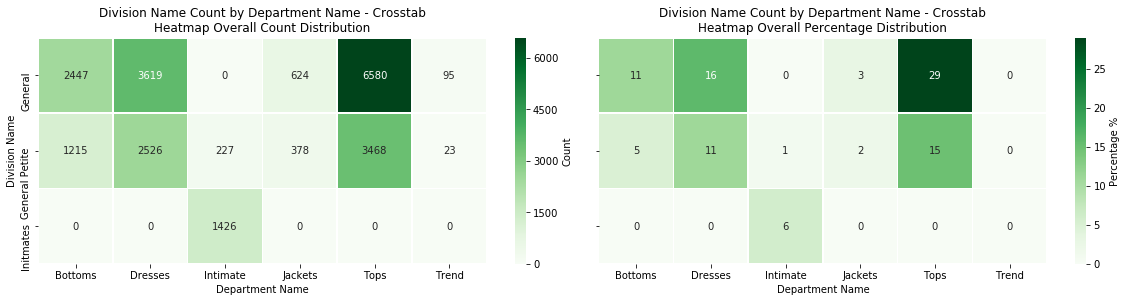

In [14]:
# Heatmaps of Percentage Pivot Table
f, ax = plt.subplots(1,2,figsize=(16, 4), sharey=True)
sns.heatmap(pd.crosstab(df['Division Name'], df["Department Name"]),
            annot=True, linewidths=.5, ax = ax[0],fmt='g', cmap="Greens",
                cbar_kws={'label': 'Count'})
ax[0].set_title('Division Name Count by Department Name - Crosstab\nHeatmap Overall Count Distribution')

sns.heatmap(pd.crosstab(df['Division Name'], df["Department Name"], normalize=True).mul(100).round(0),
            annot=True, linewidths=.5, ax=ax[1],fmt='g', cmap="Greens",
                cbar_kws={'label': 'Percentage %'})
ax[1].set_title('Division Name Count by Department Name - Crosstab\nHeatmap Overall Percentage Distribution')
ax[1].set_ylabel('')
plt.tight_layout(pad=0)
plt.show()

**How to Interpret:** <br>
For the second heatmap on the right, the percentages occurence is in relation to the whole.

**Interpretation:** <br>
Evidently, the most common product is a normal sized top.

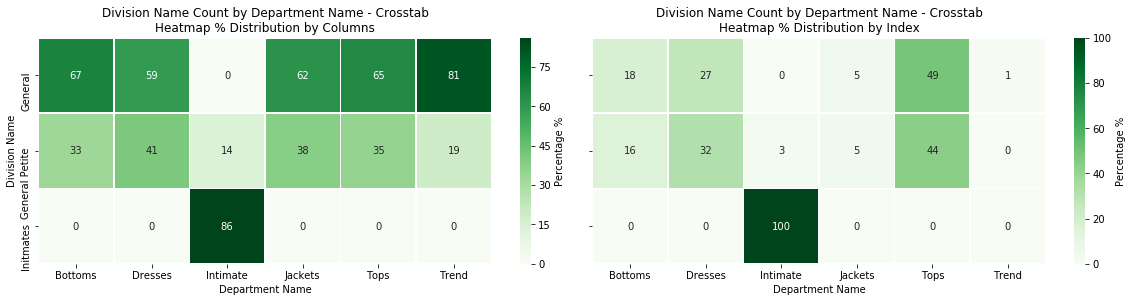

In [15]:
# Heatmaps of Percentage Pivot Table
f, ax = plt.subplots(1,2,figsize=(16, 4), sharey=True)
sns.heatmap(pd.crosstab(df['Division Name'], df["Department Name"], normalize='columns').mul(100).round(0),
            annot=True, linewidths=.5, ax=ax[0],fmt='g', cmap="Greens",
                cbar_kws={'label': 'Percentage %'})
ax[0].set_title('Division Name Count by Department Name - Crosstab\nHeatmap % Distribution by Columns')

sns.heatmap(pd.crosstab(df['Division Name'], df["Department Name"], normalize='index').mul(100).round(0),
            annot=True, linewidths=.5, ax=ax[1],fmt='g', cmap="Greens",
                cbar_kws={'label': 'Percentage %'})
ax[1].set_title('Division Name Count by Department Name - Crosstab\nHeatmap % Distribution by Index')
ax[1].set_ylabel('')
plt.tight_layout(pad=0)
plt.show()

**How to Interpret:** <br>
Although these two heatmaps use the same features, they different in the relation in which the percentage is taken. For the first plot on the left, the cumulative percentage of each column is 100%, while the plot on the right has is **standardized by row**.

**Interpretation:** <br>
The dominance of the *General* size is consistent accross the various categories within **Department Name**. There a notable overall between *General Petite* and *Department Name*.

***
**Class Name by Department Name:**

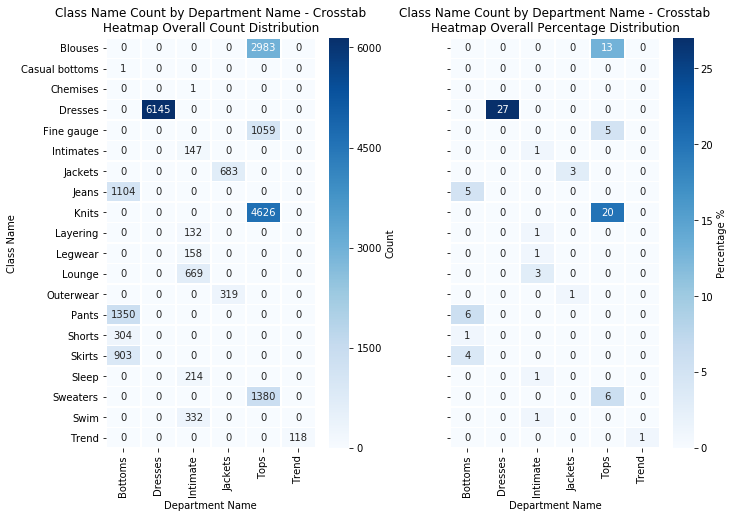

In [16]:
# Heatmaps of Percentage Pivot Table
f, ax = plt.subplots(1,2,figsize=(10, 7), sharey=True)
fsize = 13
sns.heatmap(pd.crosstab(df['Class Name'], df["Department Name"]),
            annot=True, linewidths=.5, ax = ax[0],fmt='g', cmap="Blues",
                cbar_kws={'label': 'Count'})
ax[0].set_title('Class Name Count by Department Name - Crosstab\nHeatmap Overall Count Distribution')

sns.heatmap(pd.crosstab(df['Class Name'], df["Department Name"], normalize=True).mul(100).round(0),
            annot=True, linewidths=.5, ax=ax[1],fmt='g', cmap="Blues",
                cbar_kws={'label': 'Percentage %'})
ax[1].set_title('Class Name Count by Department Name - Crosstab\nHeatmap Overall Percentage Distribution')
ax[1].set_ylabel('')
plt.tight_layout(pad=0)
plt.show()

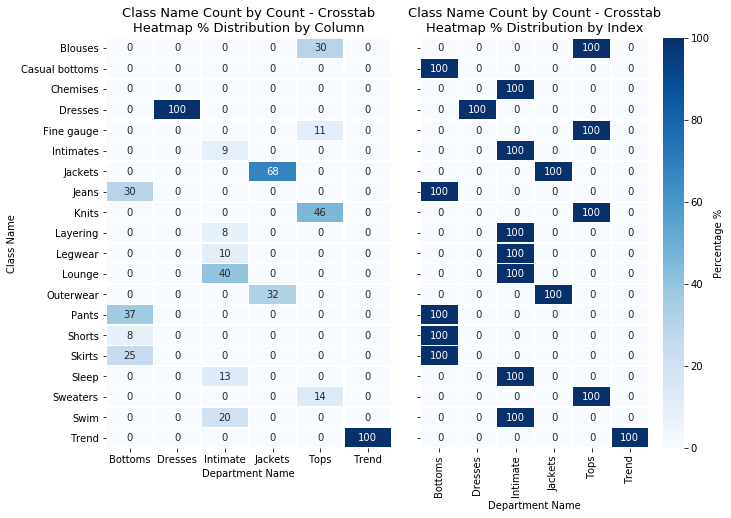

In [17]:
# Heatmaps of Percentage Pivot Table
f, ax = plt.subplots(1,2,figsize=(10, 7), sharey=True)
fsize = 13
sns.heatmap(pd.crosstab(df['Class Name'], df["Department Name"], normalize = 'columns').mul(100).round(0)
            ,annot=True, fmt="g", linewidths=.5, ax=ax[0],cbar=False,cmap="Blues")
ax[0].set_title('Class Name Count by Count - Crosstab\nHeatmap % Distribution by Column', fontsize = fsize)
ax[1] = sns.heatmap(pd.crosstab(df['Class Name'], df["Department Name"], normalize = 'index').mul(100).round(0)
            ,annot=True, fmt="2g", linewidths=.5, ax=ax[1],cmap="Blues",
                cbar_kws={'label': 'Percentage %'})
ax[1].set_title('Class Name Count by Count - Crosstab\nHeatmap % Distribution by Index', fontsize = fsize)
ax[1].set_ylabel('')
plt.tight_layout(pad=0)
plt.show()

***
**Division Name by Department Name:**

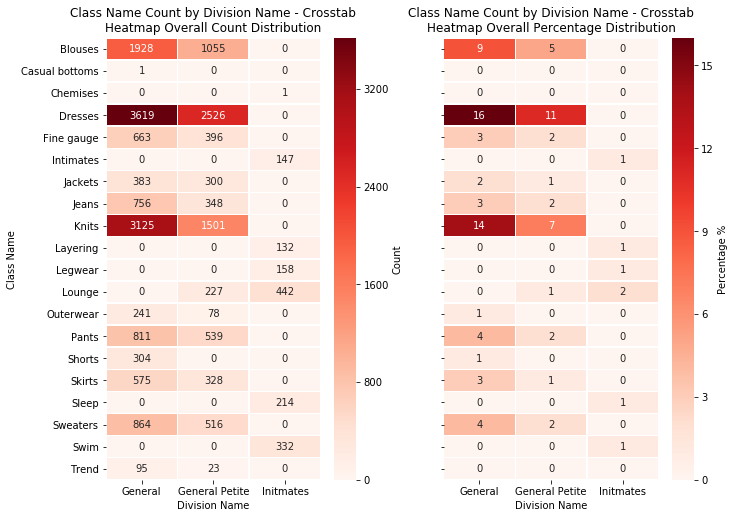

In [18]:
# Heatmaps of Percentage Pivot Table
f, ax = plt.subplots(1,2,figsize=(10, 7), sharey=True)
fsize = 13
sns.heatmap(pd.crosstab(df['Class Name'], df["Division Name"]),
            annot=True, linewidths=.5, ax = ax[0],fmt='g', cmap="Reds",
                cbar_kws={'label': 'Count'})
ax[0].set_title('Class Name Count by Division Name - Crosstab\nHeatmap Overall Count Distribution')

sns.heatmap(pd.crosstab(df['Class Name'], df["Division Name"], normalize=True).mul(100).round(0),
            annot=True, linewidths=.5, ax=ax[1],fmt='g', cmap="Reds",
                cbar_kws={'label': 'Percentage %'})
ax[1].set_title('Class Name Count by Division Name - Crosstab\nHeatmap Overall Percentage Distribution')
ax[1].set_ylabel('')
plt.tight_layout(pad=0)
plt.show()

**Interpretation:** <br>
While *General Tops* are the most common **Division and Department**, its supremecy is spread over multiple products. Meanwhile, *Dresses* are single-handedly the most popular item.

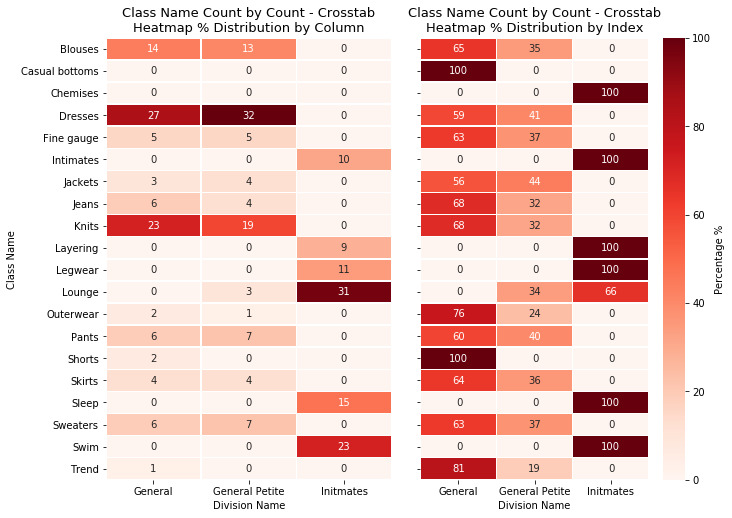

In [19]:
# Heatmaps of Percentage Pivot Table
f, ax = plt.subplots(1,2,figsize=(10, 7), sharey=True)
fsize = 13
sns.heatmap(pd.crosstab(df['Class Name'], df["Division Name"], normalize = 'columns').mul(100).round(0)
            ,annot=True, fmt="g", linewidths=.5, ax=ax[0],cbar=False,cmap="Reds")
ax[0].set_title('Class Name Count by Count - Crosstab\nHeatmap % Distribution by Column', fontsize = fsize)
ax[1] = sns.heatmap(pd.crosstab(df['Class Name'], df["Division Name"], normalize = 'index').mul(100).round(0)
            ,annot=True, fmt="2g", linewidths=.5, ax=ax[1],cmap="Reds",
                cbar_kws={'label': 'Percentage %'})
ax[1].set_title('Class Name Count by Count - Crosstab\nHeatmap % Distribution by Index', fontsize = fsize)
ax[1].set_ylabel('')
plt.tight_layout(pad=0)

# MANUAL NORMALIZE with Applied Lambda on Pandas DataFrame
# ctab = pd.crosstab(df['Class Name'], df["Rating"]).apply(lambda r: r/r.sum(), axis=1).mul(100)

**Interpretation:** <br>
This heatmap above exposes the redundant nature of the "Division Name" variable. Furthermore, it indicates that "Petite" is a unecessary category within "Class Name" since it is already described in the "Department Name" variable as "Petites".

It should also be noted that "Department Name's" Other category only applies to dresses, so it should be renamed as such.

***
### 3.2  Continuous Variable by Categorical Variable

Here I want to look at the behavior of the continous variables when sliced by various categorical varibles.

D:\WindowsApps\Anaconda\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:3: RuntimeWarning: divide by zero encountered in log10
  This is separate from the ipykernel package so we can avoid doing imports until


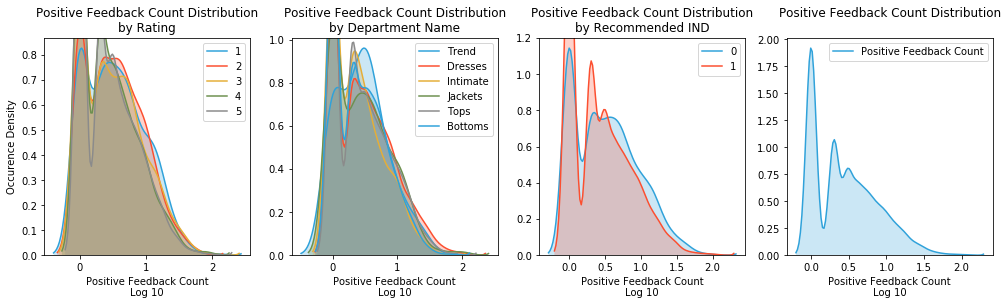

In [20]:
f, axes = plt.subplots(1,4, figsize=(17,4), sharex=False)
xvar = 'Positive Feedback Count'
plotdf = np.log10(df['Positive Feedback Count'])
for i,y in enumerate(["Rating","Department Name","Recommended IND"]):
    for x in set(df[y][df[y].notnull()]):
        sns.kdeplot(plotdf[df[y]==x], label=x, shade=True, ax=axes[i])
    axes[i].set_xlabel("{}\nLog 10".format(xvar))
    axes[i].set_label('Occurence Density')
    axes[i].set_title('{} Distribution\nby {}'.format(xvar, y))

axes[0].set_ylabel('Occurence Density')

sns.kdeplot(plotdf,shade=True,ax=axes[3])
axes[3].set_xlabel("{}\nLog 10".format(xvar))
axes[3].set_title('{} Distribution\n'.format(xvar))
plt.show()

**Interpretation:** <br>


D:\WindowsApps\Anaconda\envs\tensorflow\lib\site-packages\numpy\core\_methods.py:135: RuntimeWarning: Degrees of freedom <= 0 for slice
  keepdims=keepdims)
D:\WindowsApps\Anaconda\envs\tensorflow\lib\site-packages\numpy\core\_methods.py:127: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
D:\WindowsApps\Anaconda\envs\tensorflow\lib\site-packages\statsmodels\nonparametric\bandwidths.py:22: RuntimeWarning: invalid value encountered in minimum
  return np.minimum(np.std(X, axis=0, ddof=1), IQR)


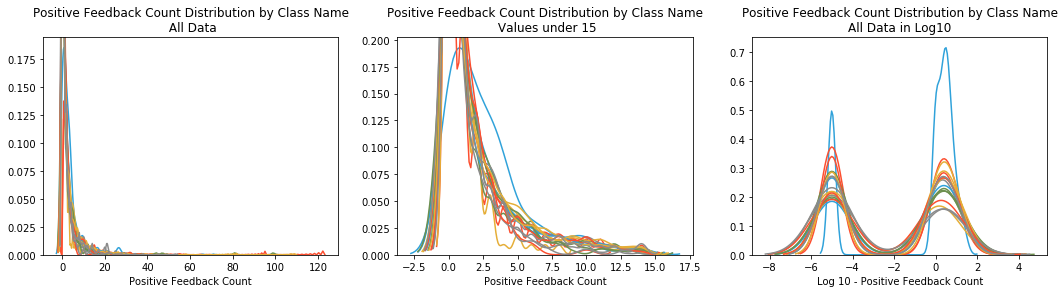

In [21]:
f, axes = plt.subplots(1,3, figsize=(18,4), sharex=False)
for x in set(df["Class Name"][df["Class Name"].notnull()]):
    sns.kdeplot(df['Positive Feedback Count'][df["Class Name"]==x]
                ,label=x, shade=False, ax=axes[0])
    
axes[0].legend_.remove()
axes[0].set_xlabel('{}'.format(xvar))
axes[0].set_title('{} Distribution by {}\n All Data'.format(xvar, "Class Name"))

min_value = 15
for x in set(df["Class Name"][df["Class Name"].notnull()]):
    sns.kdeplot(df['Positive Feedback Count'][(df["Class Name"]==x) &
                                              (df["Positive Feedback Count"] < min_value)]
                ,label=x, shade=False, ax=axes[1])
    
axes[1].legend_.remove()
axes[1].set_xlabel('{}'.format(xvar))
axes[1].set_title('{} Distribution by {}\n Values under {}'.format(xvar, "Class Name", min_value))

for x in set(df["Class Name"][df["Class Name"].notnull()]):
    sns.kdeplot(np.log10(df['Positive Feedback Count']+0.00001)[df["Class Name"]==x]
                ,label=x, shade=False, ax=axes[2])
    
axes[2].legend_.remove()
axes[2].set_xlabel('Log 10 - {}'.format(xvar))
axes[2].set_title('{} Distribution by {}\nAll Data in Log10'.format(xvar, "Class Name"))
plt.show()

**Interpretation:** <br>

D:\WindowsApps\Anaconda\envs\tensorflow\lib\site-packages\numpy\core\_methods.py:135: RuntimeWarning: Degrees of freedom <= 0 for slice
  keepdims=keepdims)
D:\WindowsApps\Anaconda\envs\tensorflow\lib\site-packages\numpy\core\_methods.py:127: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
D:\WindowsApps\Anaconda\envs\tensorflow\lib\site-packages\statsmodels\nonparametric\bandwidths.py:22: RuntimeWarning: invalid value encountered in minimum
  return np.minimum(np.std(X, axis=0, ddof=1), IQR)


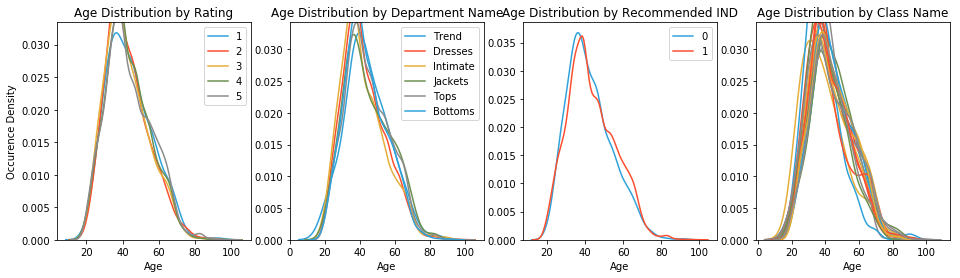

In [22]:
f, axes = plt.subplots(1,4, figsize=(16,4), sharex=False)
xvar = "Age"
plotdf = df["Age"]
for i,y in enumerate(["Rating","Department Name","Recommended IND"]):
    for x in set(df[y][df[y].notnull()]):
        sns.kdeplot(plotdf[df[y]==x], label=x, shade=False, ax=axes[i])
    axes[i].set_xlabel("{}".format(xvar))
    axes[i].set_label('Occurence Density')
    axes[i].set_title('{} Distribution by {}'.format(xvar, y))

for x in set(df["Class Name"][df["Class Name"].notnull()]):
    sns.kdeplot(plotdf[df["Class Name"]==x], label=x, shade=False, ax=axes[3])

axes[3].legend_.remove()
axes[3].set_xlabel('{}'.format(xvar))
axes[0].set_ylabel('Occurence Density')
axes[3].set_title('{} Distribution by {}'.format(xvar, "Class Name"))
plt.show()

**Interpretation:** <br>

### 3.4 Continous Variables  on Continous Variables

Time for some scatter plots. with [Seaborn Joint Plot](https://tryolabs.com/blog/2017/03/16/pandas-seaborn-a-guide-to-handle-visualize-data-elegantly/).

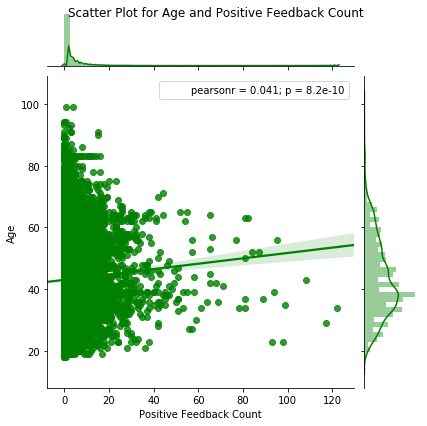

In [23]:
g = sns.jointplot(x= df["Positive Feedback Count"], y=df["Age"], kind='reg', color='g')
g.fig.suptitle("Scatter Plot for Age and Positive Feedback Count")
plt.show()

**Interpretation:** <br>
There appears to be a slight correlation between age and positive feedback count received. It would be interesting to focus on the textual anatomy of high positive feedback reviews.
***

### 3.5 Normalized Distribution Plots

Since many variables are severely unbalanced, I employ normalization to see if the proportion is consistent between categorical classes. 

[Normalization in Seaborn - Stackoverflow](https://stackoverflow.com/questions/34615854/seaborn-countplot-with-normalized-y-axis-per-group)

In [24]:
def norm_barplot(x,y,hue, data, ax=None, order= None):
    """
    Normalize the data using pandas functions, then plot using Seaborn.
    Function arguments are and extention of Seaborns'.
    """
    sns.barplot(x= x, y=y, hue=hue, ax=ax, order=order,
    data=(data[[x, hue]]
     .reset_index(drop=True)
     .groupby([x])[hue]
     .value_counts(normalize=True)
     .rename('Percentage').mul(100)
     .reset_index()
     .sort_values(hue)))
    plt.title("Percentage Frequency of {} by {}".format(hue,x))
    plt.ylabel("Percentage %")

**Code Explanation:** <br>
***
**Recommended IND by Department and Division**

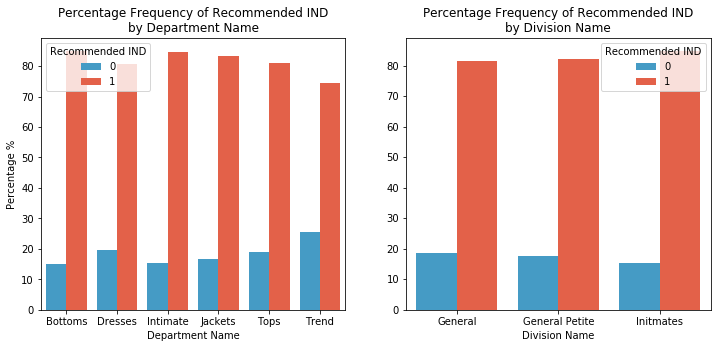

In [25]:
huevar = "Recommended IND"
f, axes = plt.subplots(1,2,figsize=(12,5))
norm_barplot(x="Department Name",y="Percentage", hue=huevar,data=df, ax=axes[0])
axes[0].set_title("Percentage Frequency of {}\nby Department Name".format(huevar))
axes[0].set_ylabel("Percentage %")
norm_barplot(x="Division Name",y="Percentage", hue=huevar,data=df, ax=axes[1])
axes[1].set_title("Percentage Frequency of {}\nby Division Name".format(huevar))
axes[1].set_ylabel("")
plt.show()

**Interpretation:** <br>
***
**Rating by Department and Divison Name**

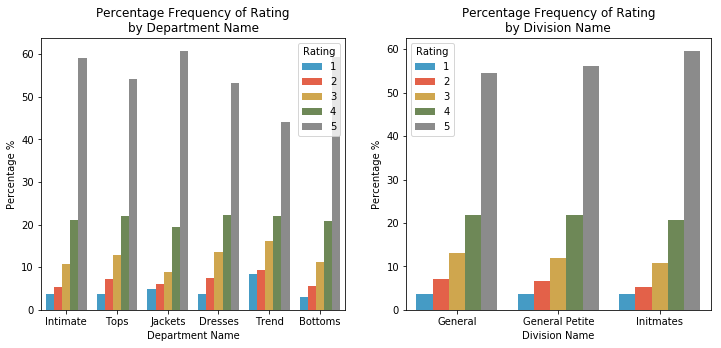

In [26]:
xvar = ["Department Name","Division Name"]
huevar = "Rating"
f, axes = plt.subplots(1,2,figsize=(12,5))
norm_barplot(x=xvar[0],y="Percentage", hue=huevar,data=df, ax=axes[0])
axes[0].set_title("Percentage Frequency of {}\nby {}".format(huevar, xvar[0]))
axes[0].set_ylabel("Percentage %")
norm_barplot(x=xvar[1],y="Percentage", hue="Rating",data=df, ax=axes[1])
axes[1].set_title("Percentage Frequency of {}\nby {}".format(huevar, xvar[1]))
plt.show()

**Interpretation:** <br>

***
**Rating by Recommended IND**

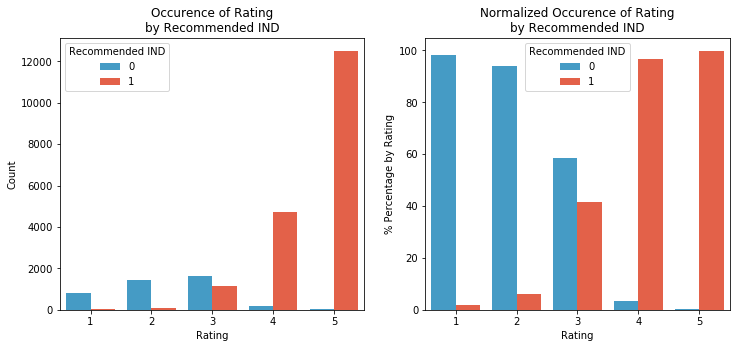

In [27]:
huevar = "Rating"
f, axes = plt.subplots(1,2,figsize=(12,5))
sns.countplot(x="Rating", hue="Recommended IND",data=df, ax=axes[0])
axes[0].set_title("Occurence of {}\nby {}".format(huevar, "Recommended IND"))
axes[0].set_ylabel("Count")
norm_barplot(x="Rating",y="Percentage", hue="Recommended IND",data=df, ax=axes[1])
axes[1].set_title("Normalized Occurence of {}\nby {}".format(huevar, "Recommended IND"))
axes[1].set_ylabel("% Percentage by Rating")
plt.show()

**Interpretation:** <br>

***

## 3.6 Multivariate Analysis

**Rating by Recommended IND**

Since I want to take the average of the **Rating** variable, I must convert it from a pandas 'category' variable to an integer.

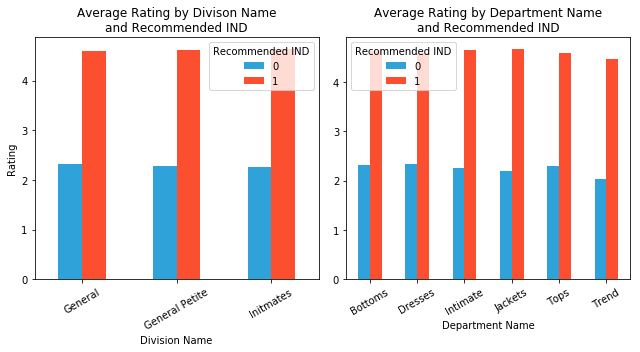

In [28]:
f, axes = plt.subplots(1,2,figsize=(9,5))
rot = 30
df.pivot_table('Rating', index='Division Name',
               columns=['Recommended IND']).plot.bar(ax=axes[0], rot=rot)
axes[0].set_title("Average Rating by Divison Name\nand Recommended IND")
df.pivot_table('Rating', index='Department Name',
               columns=['Recommended IND']).plot.bar(ax=axes[1], rot=rot)
axes[0].set_ylabel("Rating")
axes[1].set_title("Average Rating by Department Name\nand Recommended IND")
f.tight_layout()
#f.subplots_adjust(top=0.93)
plt.show()

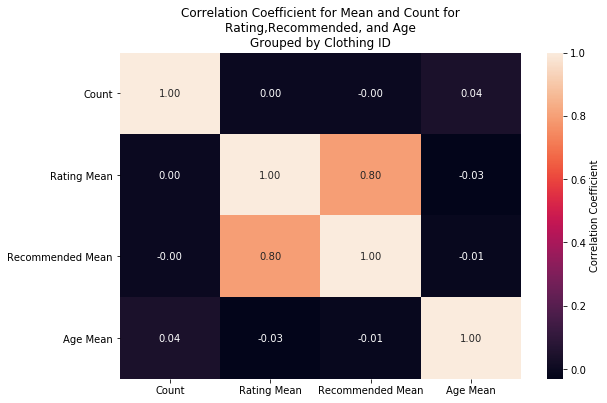

In [29]:
temp = (df.groupby('Clothing ID')[["Rating","Recommended IND", "Age"]]
        .aggregate(['count','mean']))
temp.columns = ["Count","Rating Mean","Recommended IND Count",
                "Recommended Mean","Age Count","Age Mean"]
temp.drop(["Recommended IND Count","Age Count"], axis=1, inplace =True)

# Plot Correlation Matrix
f, ax = plt.subplots(figsize=[9,6])
ax = sns.heatmap(temp.corr()
    , annot=True, fmt=".2f",cbar_kws={'label': 'Correlation Coefficient'})
ax.set_title("Correlation Coefficient for Mean and Count for\nRating,Recommended, and Age\nGrouped by Clothing ID")
plt.show()

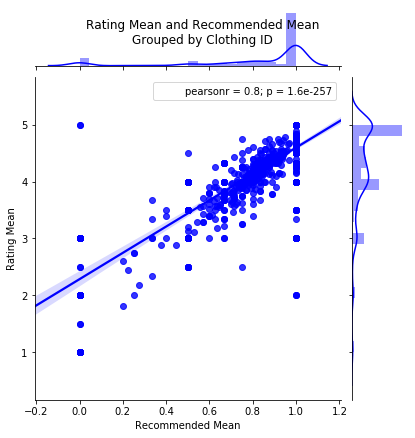

In [30]:
g = sns.jointplot(x= "Recommended Mean",y='Rating Mean',data=temp,
                  kind='reg', color='b')
plt.subplots_adjust(top=0.999)
g.fig.suptitle("Rating Mean and Recommended Mean\nGrouped by Clothing ID")
plt.show()

***
[**Clustering Dendrogram**](https://python-graph-gallery.com/404-dendrogram-with-heat-map/)

***

## 4.  Text <a id="Text"></a>

Now that a general understanding of the variables have been laid out, I will begin to analysis the customer reviews.

### 4.1 Pe-Processing

In [31]:
pd.set_option('max_colwidth', 500)
df[["Title","Review Text", "Rating"]].sample(7)

,Title,Review Text,Rating
7800,Pretty under blazer or without.,This blouse is so pretty! i love the neck tie which gives it interest and won't look boring on it's own. i'll wear this all-year round. i ordered an xxs which fits perfect.,5
15127,Wanted to love this,"I saw this sweater on-line and loved it until i tried it on. i'm 5-7, flat chested, 135 pounds and i ordered a size small. the sweater fit everywhere except for my arms. this sweater will work great if you are short. consider making your sweaters a little longer, because i do not consider myself tall.",1
14808,Hard to get,"This dress was hard for me to get on but once i did...my oh my. i am quite top heavy including my upper arms and back, so forcing the waistband over my shoulders made me panic a bit. after the struggle, it fits like a glove and skims over all my yucky parts! can't stop caressing the fabric and i hope my date (aka the hubs) feels the same. dress is not lined. i would've liked a soft mesh type lining similar to what plenty uses. petite was sold out so i bought medium regular and it skims...",5
3861,Material is amazing,"I am in love with this dress. it's super soft, flattering and comfy i want to wear it everyday. it was recommended to me by a friend who is taller and slimmer than i am so i was skeptical of the fit. sometimes you see things that are only meant for models to wear. so not true here. i am 5'3"" 140 pounds with slightly broad shoulders and i bought an xs. i'm considering getting a second one.",5
5395,Soft and flattering,"What a great little find. it is so soft, and the color blends with everything. a great way to get a few more weeks out of your summer sleeveless dresses, and ease into fall. great with t shirts and pants as well.the collar is flattering over any neckline. it also looks great as a shirt. it really can be worn all year round. i usually wear a size six on top, as ""my girls"" are large. the medium was a perfect fit. and there was no billowing in the back. worth the price, as it will become a go t...",5
23275,Darling top,Love this top! off the shoulder fits great! little extra room around the torso than i'd love... but still absolutely in love with this top! the black lace detail on the bottom is amazing! love the colors for fall! ordered a small and i'm 5'9 138lbs and i ordered a small,5
17964,Pretty but very thin,"This sweater is very pretty but the material is extremely thin. the blue was ok but the white is nearly see-through. the design is unique but unless it fits really well, the bottom hem where it criss-crosses can bunch out in a weird way. i got my usual s and it was rather loose, causing this to happen. i suggest you size down if you want it to look smooth like it does on the model.",4


Evidently, the text data requires further processing .

In [32]:
from nltk.stem.lancaster import LancasterStemmer
from nltk.stem.porter import PorterStemmer
#ps = LancasterStemmer()
ps = PorterStemmer()

tokenizer = RegexpTokenizer(r'\w+')
stop_words = set(stopwords.words('english'))

def preprocessing(data):
    txt = data.str.lower().str.cat(sep=' ') #1
    words = tokenizer.tokenize(txt) #2
    words = [w for w in words if not w in stop_words] #3
    #words = [ps.stem(w) for w in words] #4
    return words

**Code Explanation:** <br>
This chunk of code creates a function that takes each review and combines them into one seamless text. It then applies lowercase, tokenizer, removes stopwords and punctuation, and finally uses the PorterStemmer.

***

**Interpretation:** <br>
In order to process the dataset’s centerpiece, the review body, I utilized the NLTK package to lowercase, tokenize, and remove stopwords and punctuation. Tokenizing treats each word as its own value, while the other steps gets rid of the noise and irrelevant symbols in the data, standardizing the reviews for analysis. Upon reviewing the performance of text analysis, I decided to implement the Porter Stemmer on the tokens in order to combine words with tense and plurality deviance. I contemplated exploring the use of sequential models, such as Long Short-term memory, which would benefit from stopwords, but unfortunately I could only find predictive applications of it, no insight extracting aspects. 

The last piece of data transformation conducted was to bin the continuous variable age into a categorical variable: age category.

***

### 4.2 Sentiment Analysis <a id="Sentiment Analysis"></a>

My first attempt at understanding the customer reviews is to see how the textual sentiment relates to the rating scores. With this method, it will be possible to distinguish outright positive and negative comments from the contructive variant.

I will also explore the interaction between sentiment score:
- Raiting
- Recommended
- Positive Feedback Count

In [33]:
# Pre-Processing
SIA = SentimentIntensityAnalyzer()
df["Review Text"]= df["Review Text"].astype(str)

# Applying Model, Variable Creation
df['Polarity Score']=df["Review Text"].apply(lambda x:SIA.polarity_scores(x)['compound'])
df['Neutral Score']=df["Review Text"].apply(lambda x:SIA.polarity_scores(x)['neu'])
df['Negative Score']=df["Review Text"].apply(lambda x:SIA.polarity_scores(x)['neg'])
df['Positive Score']=df["Review Text"].apply(lambda x:SIA.polarity_scores(x)['pos'])

# Converting 0 to 1 Decimal Score to a Categorical Variable
df['Sentiment']=''
df.loc[df['Polarity Score']>0,'Sentiment']='Positive'
df.loc[df['Polarity Score']==0,'Sentiment']='Neutral'
df.loc[df['Polarity Score']<0,'Sentiment']='Negative'

#### **Code Explanation:** <br>
*Pre-processing* chunk loads the NLTK Sentiment Intensity Analyzer module, selects desired variables, and finally applies lowercasing to the column of reviews in the dataframe. The second paragraph of code *Applying Model and Variable Creation* classifies each review in the dataset on three dimensions: Positive, Neutral, and Negative. These results are stored in three respective columns. The overall sentiment is then determined and stored in the Sentiment column.

- Neutral/Negative/Postive Score: Indicates the potency of these classes between 0 and 1. Onl
- Polarity Score: Measures the difference between the Positive/Neutral/Negative values, where a positive numbers closer to 1 indicates overwhelming positivity, and a negative number closer to -1 indicates overwhelming negativity.

***

**Normalize Plots for Sentiment Distribution**

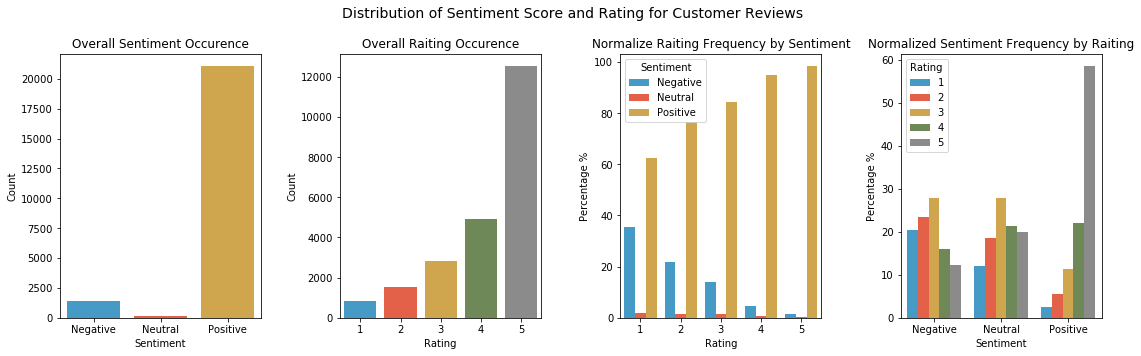

In [34]:
f, axes = plt.subplots(1,4, figsize=[16,5])
sns.countplot(x="Sentiment", data=df, ax=axes[0], order=["Negative","Neutral","Positive"])
axes[0].set_xlabel("Sentiment")
axes[0].set_ylabel("Count")
axes[0].set_title("Overall Sentiment Occurence")

sns.countplot(x="Rating", data=df, ax=axes[1])
axes[1].set_xlabel("Rating")
axes[1].set_ylabel("Count")
axes[1].set_title("Overall Raiting Occurence")

norm_barplot(x="Rating",y="Percentage",hue="Sentiment",data=df, ax=axes[2])
axes[2].set_xlabel("Rating")
axes[2].set_ylabel("Percentage %")
axes[2].set_title("Normalize Raiting Frequency by Sentiment")

norm_barplot(x="Sentiment",y="Percentage",hue="Rating",data=df, ax=axes[3])
axes[3].set_ylabel("Occurence Frequency")
axes[3].set_title("Normalized Sentiment Frequency by Raiting")
axes[3].set_xlabel("Sentiment")
axes[3].set_ylabel("Percentage %")

f.suptitle("Distribution of Sentiment Score and Rating for Customer Reviews", fontsize=14)
f.tight_layout()
f.subplots_adjust(top=0.85)
plt.show()

**Interpretation:** <br>
The last chunk, Visualization, plots the frequency of sentiments in a bar plot using matplotlib.

***


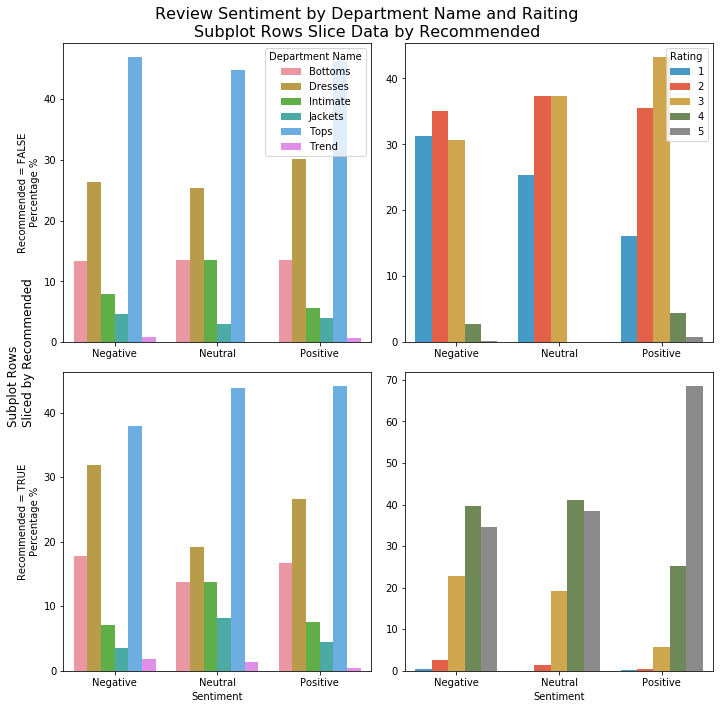

In [35]:

# Tweakable Variables (Note to Change Order Arguement if Xvar is changed)
xvar = "Sentiment"
huevar = "Department Name"
rowvar = "Recommended IND"

# Plot
f, axes = plt.subplots(2,2,figsize=(10,10), sharex=False,sharey=False)
for i,x in enumerate(set(df[rowvar][df[rowvar].notnull()])):
    norm_barplot(x=xvar,y="Percentage", hue=huevar,data=df[df[rowvar] == x],
                 ax=axes[i,0], order=["Negative","Neutral","Positive"])
    norm_barplot(x=xvar,y="Percentage", hue="Rating",data=df[df[rowvar] == x],
                 ax=axes[i,1], order=["Negative","Neutral","Positive"])

# Plot Aesthetics
axes[1,0].legend_.remove()
axes[1,1].legend_.remove()
axes[0,1].set_ylabel("")
axes[1,1].set_ylabel("")
axes[0,0].set_xlabel("")
axes[0,1].set_xlabel("")
axes[0,0].set_ylabel("Recommended = FALSE\nPercentage %")
axes[1,0].set_ylabel("Recommended = TRUE\nPercentage %")
axes[1,1].set_title("")

# Common title and ylabel
f.text(0.0, 0.5, 'Subplot Rows\nSliced by Recommended', va='center', rotation='vertical', fontsize=12)
f.suptitle("Review Sentiment by Department Name and Raiting\nSubplot Rows Slice Data by Recommended", fontsize=16)
f.tight_layout()
f.subplots_adjust(top=0.93)
plt.show()

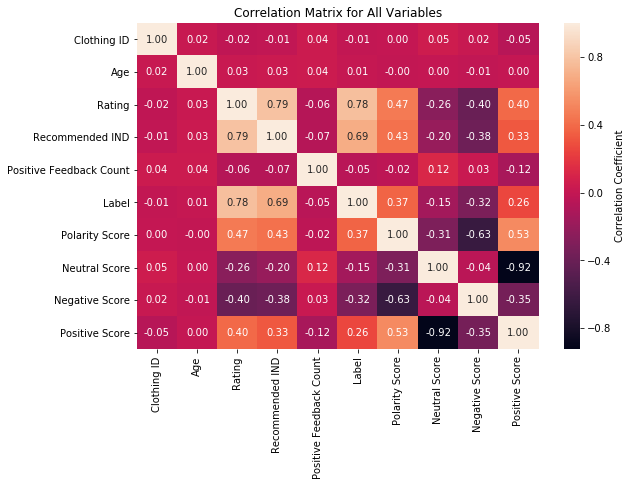

In [36]:
# Plot Correlation Matrix
f, ax = plt.subplots(figsize=[9,6])
ax = sns.heatmap(df.corr(), annot=True,
                 fmt=".2f",cbar_kws={'label': 'Correlation Coefficient'})
ax.set_title("Correlation Matrix for All Variables")

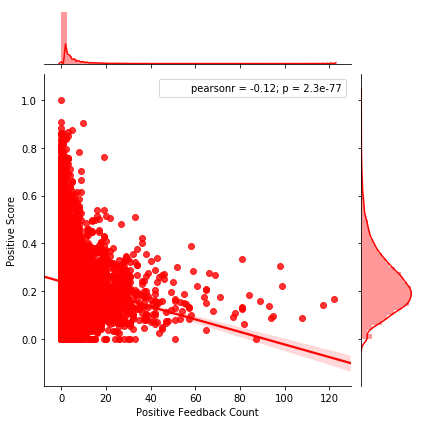

In [37]:
# Sentiment Positivity Score by Positive Feedback Count
ax = sns.jointplot(x= df["Positive Feedback Count"], y=df["Positive Score"], kind='reg', color='r')
plt.show()

Interestingly, there appears to be a substantial negative correlation between Positive Feedback Count and Positive Score, which suggests that the most acclaimed reviews on the platform are probably in the form on constructive criticism, rather than outright positivity.

## 5. Word Distribution and Word Cloud <a id="Word Distribution and Word Cloud"></a> <br>

** For this section, I deviated from the book and heavily relied upon the following online resources:** <br>
- [Kaggle Longdoa: Word Cloud in Python](https://www.kaggle.com/longdoan/word-cloud-with-python)
- [Word Cloud Package Forum](https://github.com/amueller/word_cloud/issues/134)
- [Amueller Github](https://amueller.github.io/word_cloud/auto_examples/masked.html)

In [38]:
stopwords = set(STOPWORDS)
size = (20,10)

def cloud(text, title, stopwords=stopwords, size=size):
    """
    Function to plot WordCloud
    Includes: 
    """
    # Setting figure parameters
    mpl.rcParams['figure.figsize']=(10.0,10.0)
    mpl.rcParams['font.size']=12
    mpl.rcParams['savefig.dpi']=100
    mpl.rcParams['figure.subplot.bottom']=.1 
    
    # Processing Text
    # Redundant when combined with my Preprocessing function
    wordcloud = WordCloud(width=1600, height=800,
                          background_color='black',
                          stopwords=stopwords,
                         ).generate(str(text))
    
    # Output Visualization
    fig = plt.figure(figsize=size, facecolor='k')
    plt.imshow(wordcloud)
    plt.axis('off')
    plt.title(title, fontsize=50,color='y')
    plt.tight_layout(pad=0)
    plt.show()
    
# Frequency Calculation [One-Gram]
def wordfreqviz(text, x):
    word_dist = nltk.FreqDist(text)
    top_N = x
    rslt = pd.DataFrame(word_dist.most_common(top_N),
                    columns=['Word', 'Frequency']).set_index('Word')
    matplotlib.style.use('ggplot')
    rslt.plot.bar(rot=0)

def wordfreq(text, x):
    word_dist = nltk.FreqDist(text)
    top_N = x
    rslt = pd.DataFrame(word_dist.most_common(top_N),
                    columns=['Word', 'Frequency']).set_index('Word')
    return rslt

#### **Code Explanation:** <br>
This code creates the word cloud visualization function. This function’s mathematical processes are hidden, since it does not explicitly state that it determines the frequency occurrence of each word in relation to the entire dictionary of words. Within the function, the Setting Function Parameter section creates the graphic structure using matplotlib. Then the text is formatted, and the word frequency is determined. Finally, the matplotlib structure is filled with words, where the larger the word size, the higher the word occurrence. 

### Visualize Titles

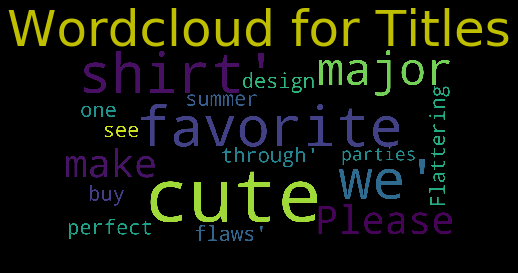

In [39]:
# Modify Stopwords to Exclude Class types, suchs as "dress"
new_stop = set(STOPWORDS)
new_stop.update([x.lower() for x in list(df["Class Name"][df["Class Name"].notnull()].unique())]
                + ["dress", "petite"])

# Cloud
cloud(text= df.Title[df.Title.notnull()].astype(str).values,
      title="Wordcloud for Titles",
      stopwords= new_stop,
      size = (7,4))

### Visualize Reviews

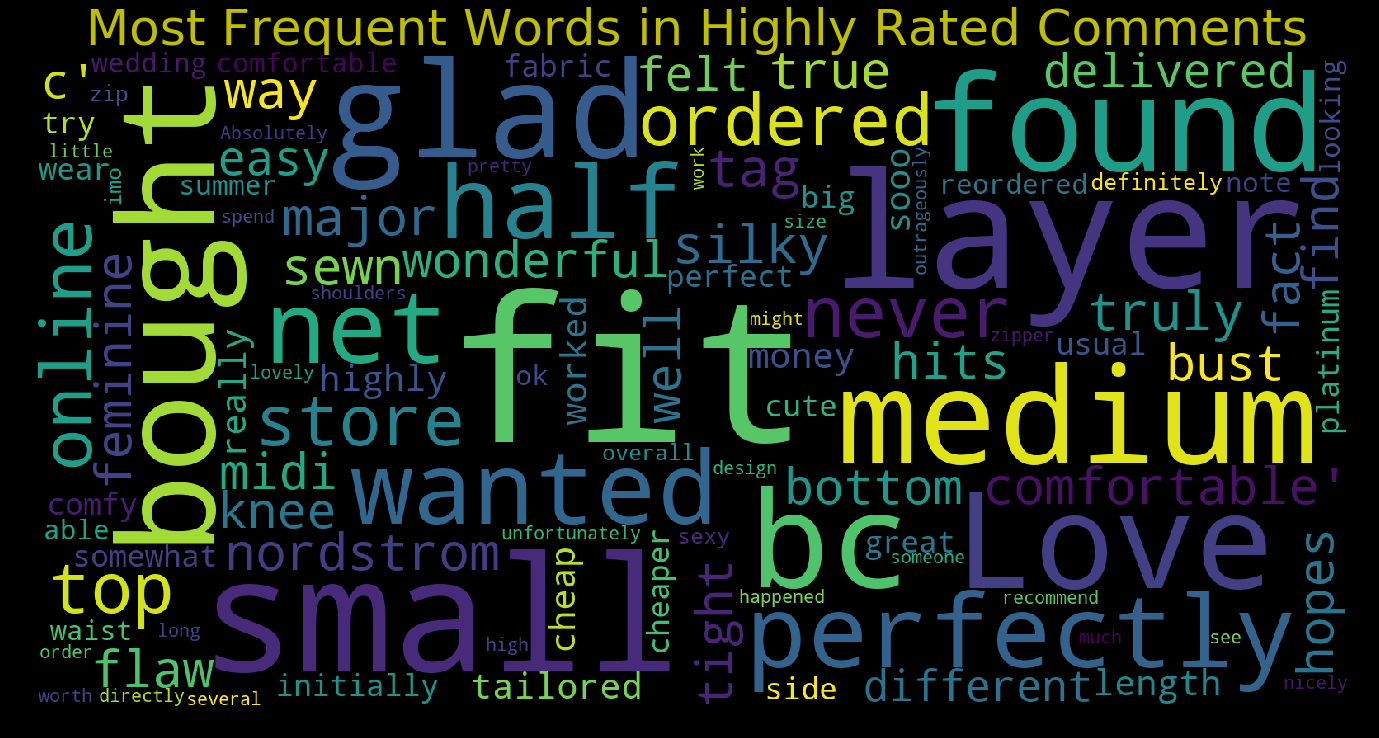

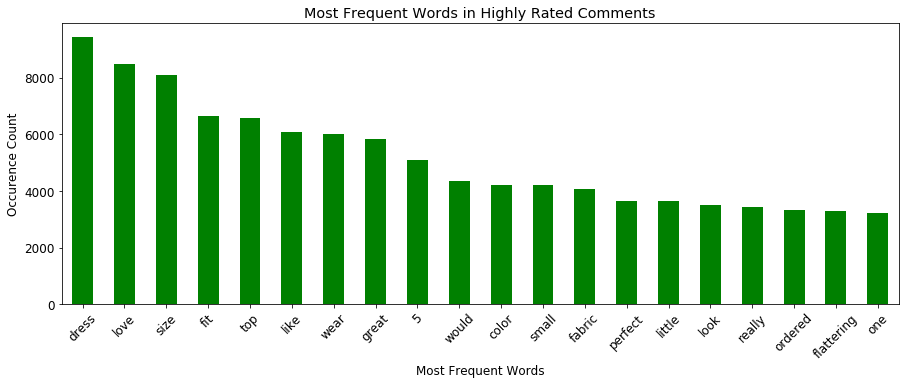

In [40]:
# Highly Raited
title ="Most Frequent Words in Highly Rated Comments"
temp = df['Review Text'][df.Rating.astype(int) >= 3]

# Modify Stopwords to Exclude Class types, suchs as "dress"
new_stop = set(STOPWORDS)
new_stop.update([x.lower() for x in list(df["Class Name"][df["Class Name"].notnull()].unique())]
                + ["dress", "petite"])

# Cloud
cloud(text= temp.values, title=title,stopwords= new_stop)

# Bar Chart
wordfreq(preprocessing(temp),20).plot.bar(rot=45, legend=False,figsize=(15,5), color='g',
                          title= title)
plt.ylabel("Occurence Count")
plt.xlabel("Most Frequent Words")
plt.show()

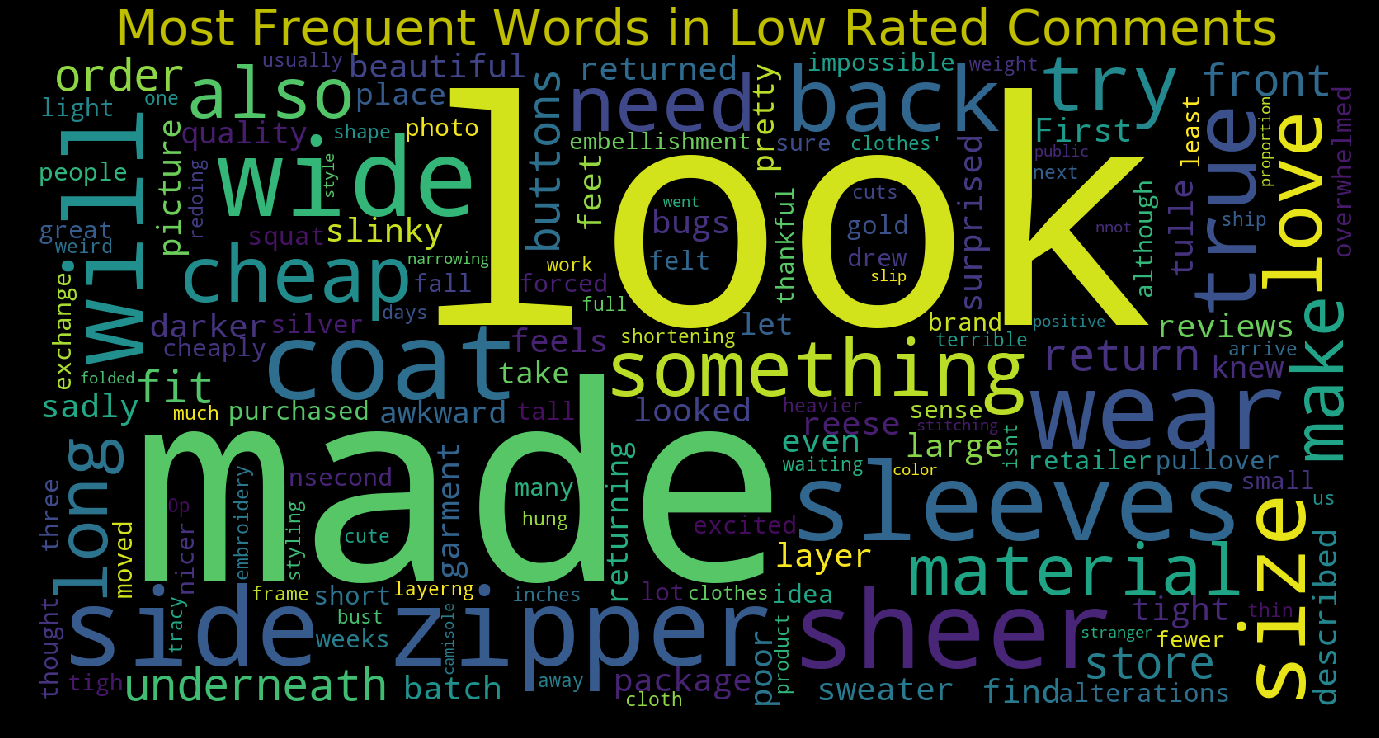

In [41]:
# Low Raited
title ="Most Frequent Words in Low Rated Comments"
temp = df['Review Text'][df.Rating.astype(int) < 3]

# Modify Stopwords to Exclude Class types, suchs as "dress"
new_stop = set(STOPWORDS)
new_stop.update([x.lower() for x in list(df["Class Name"][df["Class Name"].notnull()].unique())]
                + ["dress", "petite", "skirt","shirt"])

# Cloud
cloud(temp.values, title= title, stopwords = new_stop)

#### **Code Interpretation:** <br>
At a first glance the most common words overlap significantly between good and bad reviews. Indeed, the observation that “Dress” and “Top” are the most common words is reflected by the disproportionate number of reviews in the dress category. Looking at the rest of the words, the positive reviews tend to use words such as: Love, Comfortable, Great, Style, Small, Flattering, Wear, True. This offers the first big insight because within the expected positive words, the words “True” stands out, since it suggest consistency between customer expectation of the product and what the product actually delivered. In terms of negative reviews, notable words include: unflattering, big, unfortunately appear. These negative words represent the small proportion of words in the negative reviews. This suggests that either people are expressing their criticism with negative prefixes, such as “Not Pretty”, or people are sticking to constructive criticism only, addressing problems of fit or appearance rather than simply expressing anger.

The central flaw of these word clouds is that they only show the distribution of individual words. This removes the context of the word, as well as disregard negative prefixes. In order to solve this problem I will utilize n-grams, which increases the size of observed values from one word to multiple words, enabling frequency counts to be conducted to word sequences. Although I would have prefered to visualize these findings through the use of Word Clouds, I was unable to program this in, thus leaving me with a simple table.

In the section below, the 15th most frequent 2 and 3 gram sequences are on display for both the good and bad reviews.

### I am curious to see the wordcloud by Specific group.

Perhaps I can seperate this analysis between clouds and ngrams.

1. Department Name
2. Over 20 Positive Review Count
3. Whether it was Recommended IND

In [42]:
department_set = df["Department Name"][df["Department Name"].notnull()].unique()
division_set = df["Division Name"][df["Division Name"].notnull()].unique()
def cloud_by_category(data, category, subclass):
    """
    Function to create a wordcloud by class and subclass
    Category signifies the column variable
    Subclass refers to the specific value within the categorical variable
    """
    new_stop = set(STOPWORDS)
    new_stop.update([x.lower() for x in list(data["Class Name"][data["Class Name"].notnull()].unique())]
                   + [x.lower() for x in list(data["Department Name"][data["Department Name"].notnull()].unique())]
                   + ["dress", "petite", "jacket","top"])

    # Cloud
    cloud(text= data["Review Text"][data[category]== subclass],
          title="WordCloud for {}".format(subclass),
          stopwords= new_stop,
          size = (10,6))

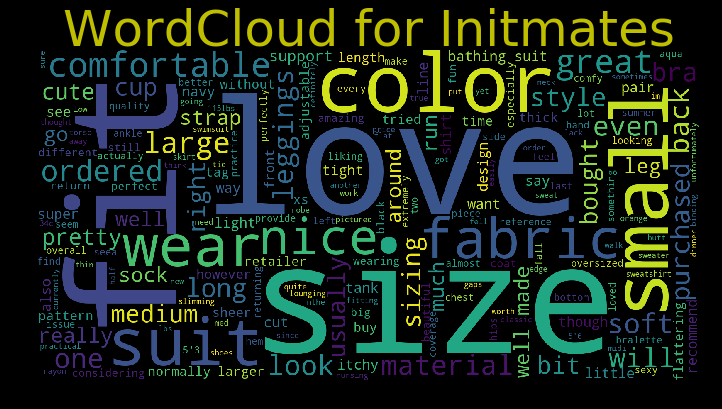

In [43]:
cloud_by_category(df, "Division Name", division_set[0])

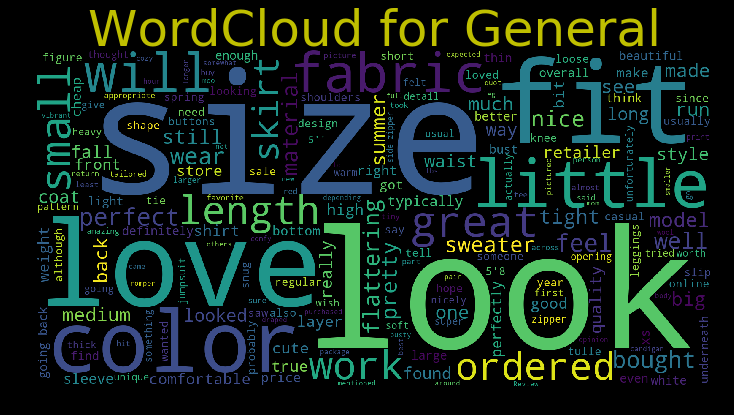

In [44]:
cloud_by_category(df, "Division Name", division_set[1])

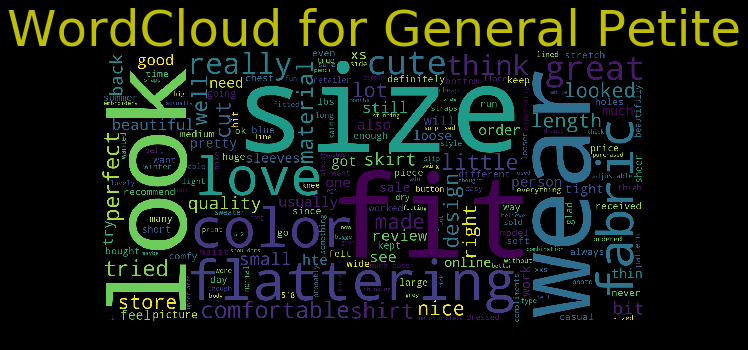

In [45]:
cloud_by_category(df, "Division Name", division_set[2])

## Extract Specific Words

Expand on this section by making new variables out of interesting words.

***
## N Grams by Recommended Feature

Create overlapping variable, which singles out worst rating and non-recommendations.

In [46]:
## Helper Functions
from nltk.util import ngrams
from collections import Counter
def get_ngrams(text, n):
    n_grams = ngrams((text), n)
    return [ ' '.join(grams) for grams in n_grams]

def gramfreq(text,n,num):
    # Extracting bigrams
    result = get_ngrams(text,n)
    # Counting bigrams
    result_count = Counter(result)
    # Converting to the result to a data frame
    df = pd.DataFrame.from_dict(result_count, orient='index')
    df = df.rename(columns={'index':'words', 0:'frequency'}) # Renaming index column name
    return df.sort_values(["frequency"],ascending=[0])[:num]

def gram_table(data, gram, length):
    out = pd.DataFrame(index=None)
    for i in gram:
        table = pd.DataFrame(gramfreq(preprocessing(data),i,length).reset_index())
        table.columns = ["{}-Gram".format(i),"Occurence"]
        out = pd.concat([out, table], axis=1)
    return out

In [47]:
gram_table(data= df['Review Text'][df["Recommended IND"].astype(int) == 0], gram=[1,2,3,4,5], length=30)

,1-Gram,Occurence,2-Gram,Occurence,3-Gram,Occurence,4-Gram,Occurence,5-Gram,Occurence
0,dress,1976,wanted love,243,really wanted love,70,really wanted love dress,15,photos reference measurements 38 30,3
1,like,1780,going back,215,wanted love dress,65,looked like maternity top,10,going back wanted love dress,3
2,top,1572,looked like,187,really wanted like,40,really wanted like dress,9,wearing medium photos reference measurements,3
3,would,1348,looks like,153,made look like,29,really wanted like top,9,medium photos reference measurements 38,3
4,fit,1327,really wanted,151,fit true size,28,5 4 120 lbs,8,reference 5 7 125 lb,3
5,fabric,1245,made look,135,wanted love top,28,really wanted love top,7,back really wanted like dress,3
6,size,1209,look like,126,ordered usual size,25,5 7 140 lbs,6,reference measurements 38 30 40,3
7,back,1039,5 4,113,way much fabric,25,measurements 38 30 40,6,arm holes also cut low,3
8,look,965,felt like,109,sadly going back,24,going back really wanted,6,ordered typically size xs chest,2
9,love,928,true size,104,usually wear size,23,looks like maternity top,5,recent 20 sale looking dresses,2


In [48]:
gram_table(data= df['Review Text'][df["Recommended IND"].astype(int) == 1], gram=[1,2,3,4,5], length=30)

,1-Gram,Occurence,2-Gram,Occurence,3-Gram,Occurence,4-Gram,Occurence,5-Gram,Occurence
0,dress,8591,true size,1243,fits true size,264,compliments every time wear,46,34b 26 waist 36 hips,27
1,love,8017,love dress,657,fit true size,192,26 waist 36 hips,32,get compliments every time wear,21
2,size,7561,5 4,622,received many compliments,163,34b 26 waist 36,28,5 2 currently 33 25,17
3,fit,5995,usually wear,588,runs true size,143,looks great skinny jeans,25,115 lbs 30 dd 26,15
4,top,5846,looks great,574,love love love,138,get compliments every time,23,115 lbs 30dd 26 5,13
5,wear,5678,fit perfectly,553,usually wear size,107,love love love dress,22,lbs 30 dd 26 5,13
6,great,5584,well made,531,every time wear,81,115 lbs 30 dd,22,2 currently 33 25 37,13
7,like,5368,love top,524,ordered usual size,79,usually wear size 4,21,30 dd 26 5 waist,12
8,5,4678,5 3,488,small fit perfectly,72,5 4 120 lbs,20,2 34b 26 waist 36,12
9,color,3887,fits perfectly,480,got many compliments,70,dress fits true size,18,lbs 30dd 26 5 waist,12


In [49]:
breakasds

NameError: name 'breakasds' is not defined

## Intelligible Supervised Learning

**Converting Text to a Model-able format: One Hot Encoding**

In [ ]:
df['tokenized'] = df["Review Text"].astype(str).str.lower() # Turn into lower case text
df['tokenized'] = df.apply(lambda row: tokenizer.tokenize(row['tokenized']), axis=1) # Apply tokenize to each row
df['tokenized'] = df['tokenized'].apply(lambda x: [w for w in x if not w in stop_words]) # Remove stopwords from each row
df['tokenized'] = df['tokenized'].apply(lambda x: [ps.stem(w) for w in x]) # Apply stemming to each row
all_words = nltk.FreqDist(preprocessing(df['Review Text'])) # Calculate word occurence from whole block of text

vocab_count = 300
word_features= list(all_words.keys())[:vocab_count] # 5000 most recurring unique words
print("Number of words columns (One Hot Encoding): {}".format(len(all_words)))

In [ ]:
labtext= list(zip(df.tokenized, (df["Recommended IND"]))) 

In [ ]:
# Function to create model features
# for each review, records which uniqeue words out of the whole text body are present
def find_features(document):
    words = set(document)
    features = {}
    for w in word_features:
        features[w] = (w in words)

    return features

In [ ]:
# Apply function to data
featuresets = [(find_features(text), LABEL) for (text, LABEL) in labtext]
len(featuresets)

In [ ]:
training_set = featuresets[:15000]
testing_set = featuresets[15000:]

## Naive Bayes

Side on WHY this model was selected.

In [ ]:
classifier = nltk.NaiveBayesClassifier.train(training_set)
# Posterior = prior_occurence * likelihood / evidence

In [ ]:
print("Classifier accuracy percent:",(nltk.classify.accuracy(classifier, testing_set))*100)
print(classifier.show_most_informative_features(40))

## Word2Vec

In [ ]:
import gensim
from gensim.models import word2vec
import os
os.chdir(r"D:\My Computer\DATA\Retail")
os.listdir()

In [ ]:
# Load Google's pre-trained Word2Vec model.
model = gensim.models.KeyedVectors.load_word2vec_format('GoogleNews-vectors-negative300.bin.gz', binary=True)

In [ ]:
df.head()

In [ ]:
w2vec = word2vec.Word2Vec(df["tokenized"], min_count=5, size=200)

In [ ]:
w2vec.most_similar(["versatil"],topn=10)

In [ ]:
w2vec.most_similar(["potato"],topn=10)

In [ ]:
w2vec.most_similar(["worst"],topn=10)

In [ ]:
w2vec.most_similar(["rag"],topn=10)

In [ ]:
w2vec.most_similar(["compliment"],topn=10)

In [ ]:
w2vec.most_similar(["love"],topn=10)

In [ ]:
w2vec.most_similar(["shame"],topn=10)

In [ ]:
w2vec.most_similar(["dear"],topn=10)